##  Create Fake data

In [235]:
import random
import numpy as np
random.seed(43)

# Create Data
dist = [10]
activity = [1]
dist_Activity = [10]
for i in range(1000):
    if (random.random()) > .55 or dist[-1] < 10:
        case = 1
    else:
        case = -1
    dist_change = random.randint(1,10)
    
    dist_Activity.append(dist[-1]+ dist_change*case)
    for x in (np.arange(dist[-1],dist[-1]+ dist_change*case,case*.25)):
        dist.append(x)
    
    if dist[-1] < 25 and random.random() > .80:
        activity.append(random.randint(0,6))
    elif random.random() > .45:
        activity.append(random.randint(1,4))
    else:
        activity.append(random.randint(0,1))

dist = np.array(dist)
activity = np.array(activity)


## Plot the activity of the animal and the behavior of the Animal
- Make sure you label the axis!
- Horizontal line

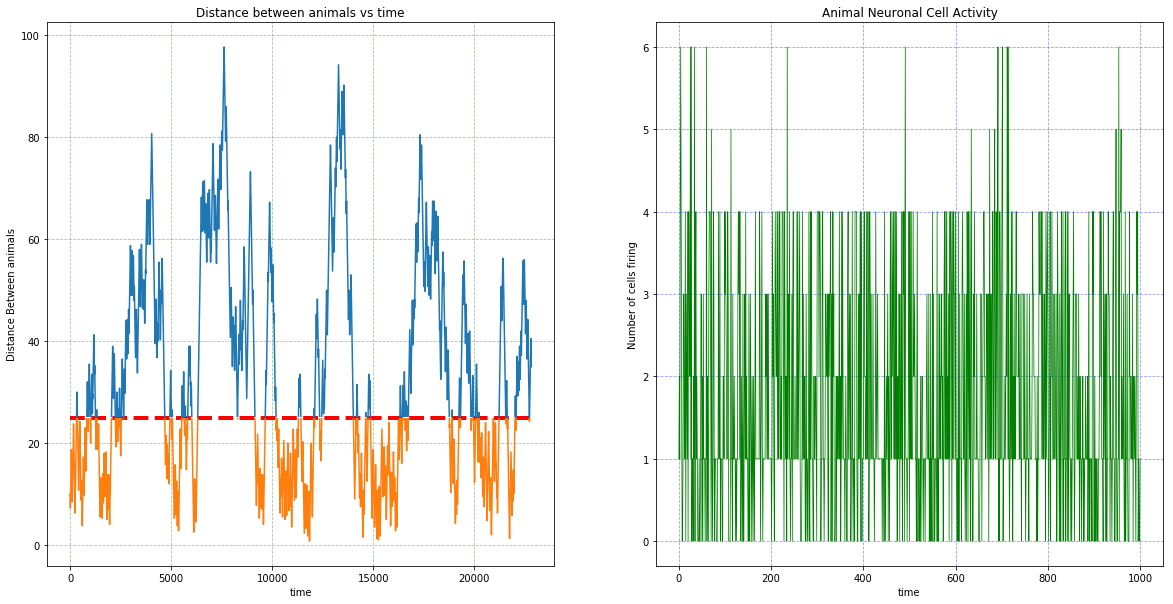

In [236]:
import matplotlib.pyplot as plt
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))


upper = 25

dist_lower = np.ma.masked_where(dist <= upper, dist)
dist_upper = np.ma.masked_where(dist >= upper, dist)

ax1.plot(range(len(dist)), dist_lower, range(len(dist)), dist_upper)

ax1.hlines(25,0,len(dist),color ='r',linestyle = '--',linewidth=4)
ax1.set_xlabel('time')
ax1.set_ylabel('Distance Between animals')
ax1.set_title('Distance between animals vs time')
ax1.grid(alpha = .4,c='g',ls = '--')

ax2.plot(range(1001),activity,c='g',linewidth=.75)
ax2.set_xlabel('time')
ax2.set_ylabel('Number of cells firing')
ax2.set_title('Animal Neuronal Cell Activity')
ax2.grid(alpha = .4,c='b',ls = '--')

plt.show()

### Find out the mean of the activity across all behavior, and specifically when the animal are nearby (interacting)

**Mean Activity across all Behavior**: The average number of cells that are firing across the entire session of interaction. 
**Activity During Inteaction**: The average number of cells that are firing during interaction with another animal

In [237]:
# Save out the index where the animals are interacting
dist_Activity = np.array(dist_Activity)
idx_lt25 = dist_Activity < 25

# Save out the value of the activity when the animals are interacting
val = np.round(np.mean(activity[idx_lt25]),2)

print('The mean of the activity is: ',np.round(np.mean(activity),2),'Cells Firing')
print('The mean of the activity when less than 25 cm from each other is:'\
      ,val,'Cells firing')

The mean of the activity is:  1.75 Cells Firing
The mean of the activity when less than 25 cm from each other is: 1.92 Cells firing


### Run Simulations to see where this value lies on a distribution that was randomized

Create a distribution of number of cells by boostrapping the data.


See where the value lies


Calculate P-val

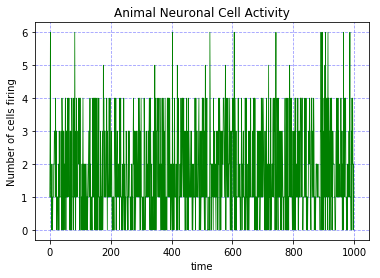

In [238]:
random.shuffle(activity)
plt.plot(range(1001),activity,c='g',linewidth=.75)
plt.xlabel('time')
plt.ylabel('Number of cells firing')
plt.title('Animal Neuronal Cell Activity')
plt.grid(alpha = .4,c='b',ls = '--')

In [239]:
lst = []

#Run simulation 10,000 times, randomizing the activity each time
for i in range(10000):
    random.shuffle(activity)
    lst.append(np.round(np.mean(activity[idx_lt25]),2))
lst = np.array(lst)

Now plot a histogram of whats going on!

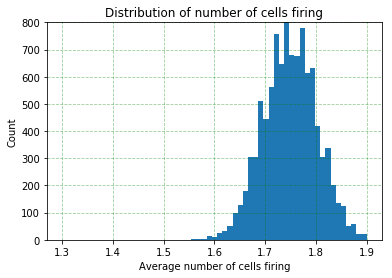

In [240]:
# val = 1.55

bins = np.linspace(1.3, 1.9, num=60)
plt.hist(lst[lst < val],bins = bins);
plt.hist(lst[lst >= val],bins = bins);
plt.ylim([0,800])
plt.grid(alpha=.4,c='g',ls='--')
plt.title('Distribution of number of cells firing')
plt.xlabel('Average number of cells firing')
plt.ylabel('Count');

In [230]:
print('In this case, the p val is 1 -',(sum(lst < val)/10000))

In this case, the p val is 1 - 0.0
